In [28]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\chooyen\myenv\streamlit_apps\streamlit-Course Selection\data\Poly 2023 LAS Reference.xlsx"

# Read all sheets and include sheet name as a column
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Combine all sheets into one DataFrame
df_combined = pd.concat(
    {sheet_name: sheet.assign(Sheet_Name=sheet_name) for sheet_name, sheet in all_sheets.items()},
    ignore_index=True
)

# Display the combined DataFrame
df_combined.head()

,MOE Course Code,Course Name,Aggregate Type,2023 Range of Aggregate Score (Net),Sheet_Name
0,R40,AEROSPACE ENGINEERING,ELR2B2-C,12-26,RP
1,R17,APPLIED CHEMISTRY,ELR2B2-C,12-18,RP
2,R25,ARTS & THEATRE MANAGEMENT,ELR2B2-A,13-19,RP
3,R39,AVIATION MANAGEMENT,ELR2B2-C,15-25,RP
4,R14,BIOMEDICAL SCIENCE,ELR2B2-C,7-12,RP


In [29]:
# Splitting the '2023 Range of Aggregate Score (Net)' into 'Min Aggregate' and 'Max Aggregate'
df_combined[['Min Aggregate', 'Max Aggregate']] = df_combined['2023 Range of Aggregate Score (Net)'].str.split('-', expand=True)

# Display the updated DataFrame
df_combined.head()

,MOE Course Code,Course Name,Aggregate Type,2023 Range of Aggregate Score (Net),Sheet_Name,Min Aggregate,Max Aggregate
0,R40,AEROSPACE ENGINEERING,ELR2B2-C,12-26,RP,12,26
1,R17,APPLIED CHEMISTRY,ELR2B2-C,12-18,RP,12,18
2,R25,ARTS & THEATRE MANAGEMENT,ELR2B2-A,13-19,RP,13,19
3,R39,AVIATION MANAGEMENT,ELR2B2-C,15-25,RP,15,25
4,R14,BIOMEDICAL SCIENCE,ELR2B2-C,7-12,RP,7,12


In [30]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   MOE Course Code                      198 non-null    object
 1   Course Name                          200 non-null    object
 2   Aggregate Type                       198 non-null    object
 3   2023 Range of Aggregate Score (Net)  198 non-null    object
 4   Sheet_Name                           202 non-null    object
 5   Min Aggregate                        198 non-null    object
 6   Max Aggregate                        198 non-null    object
dtypes: object(7)
memory usage: 11.2+ KB


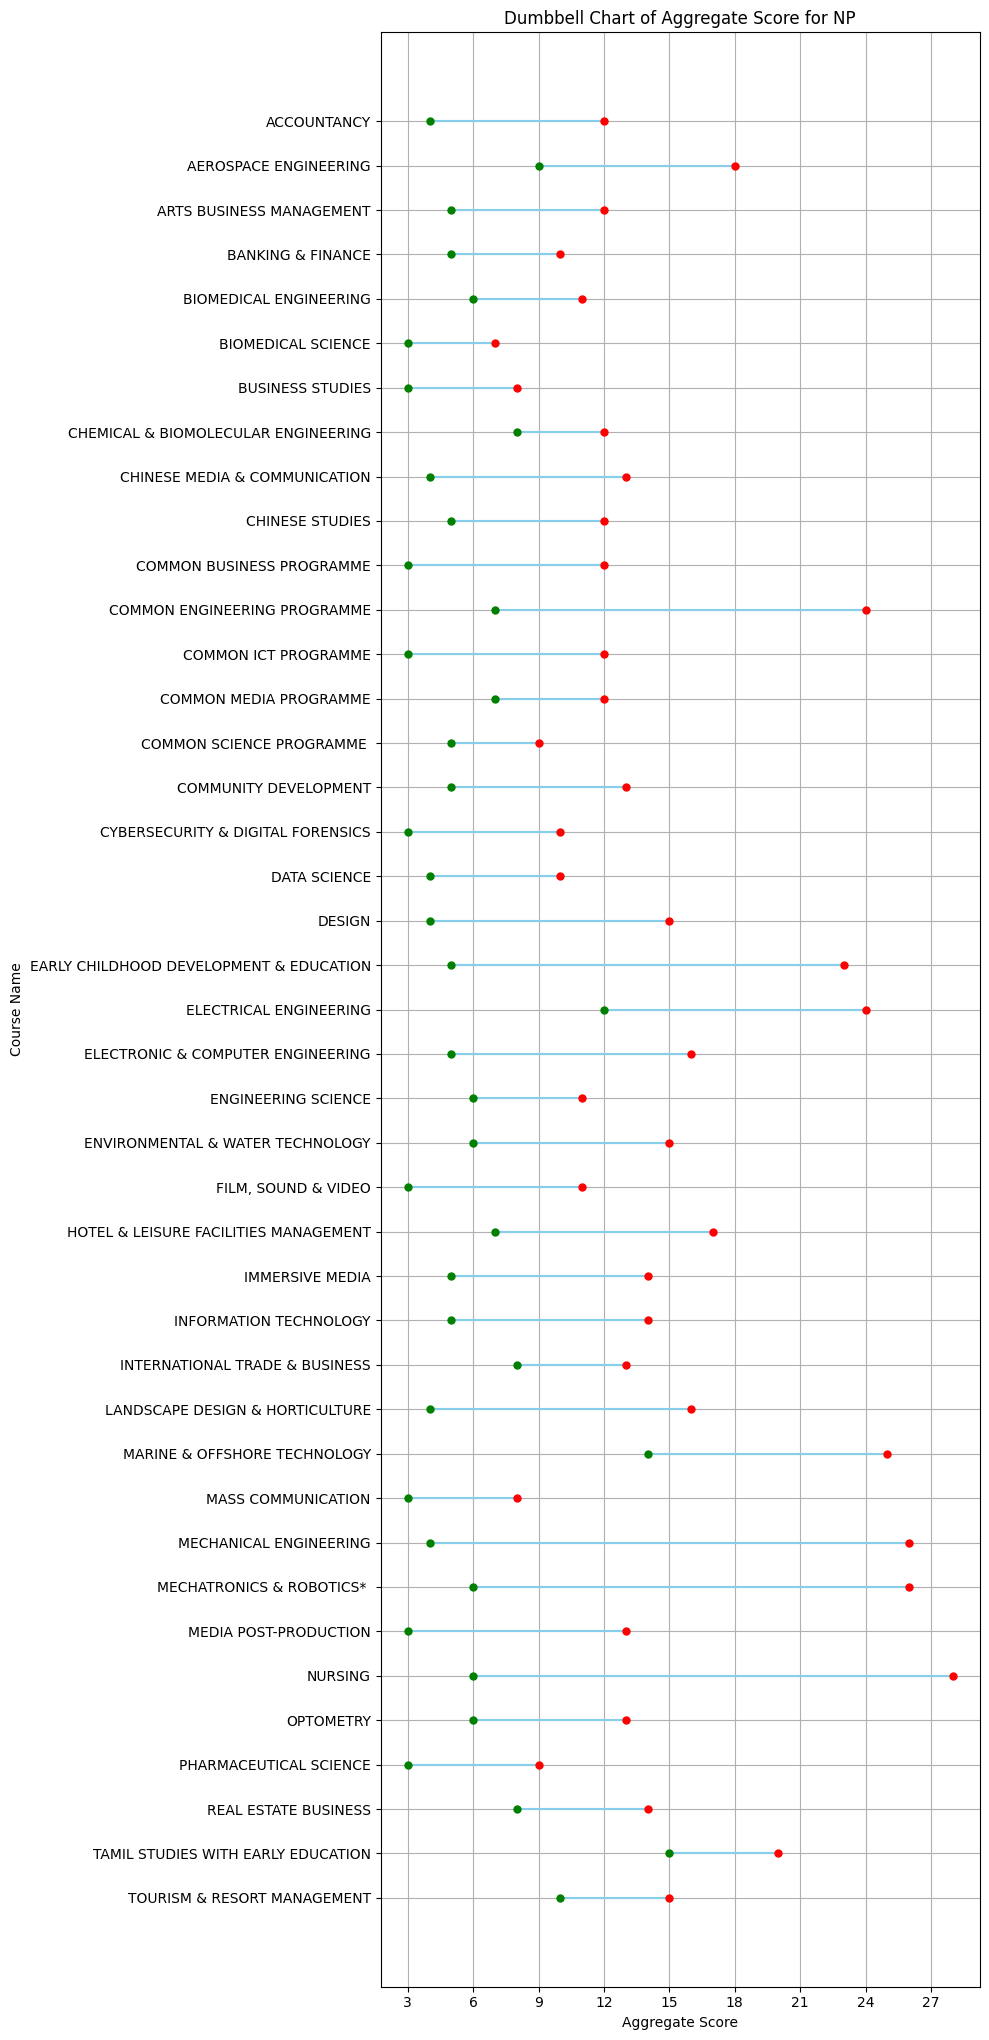

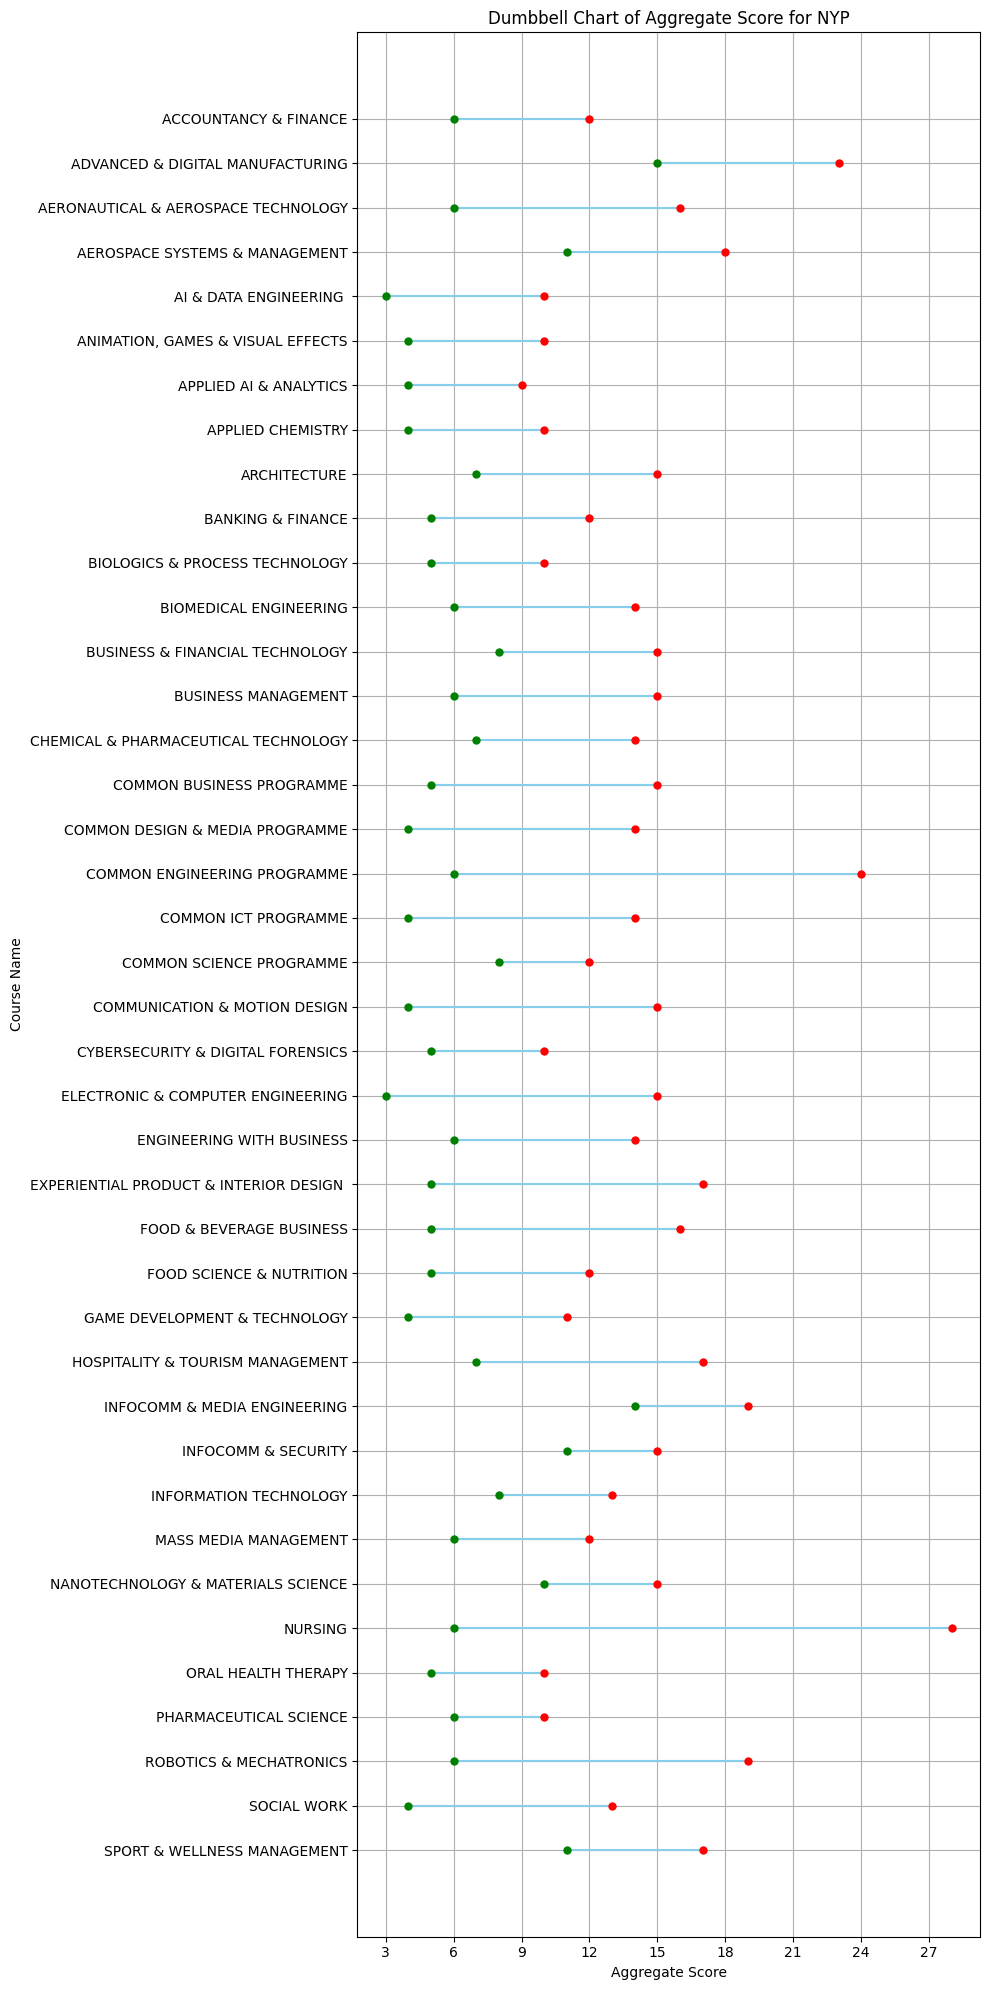

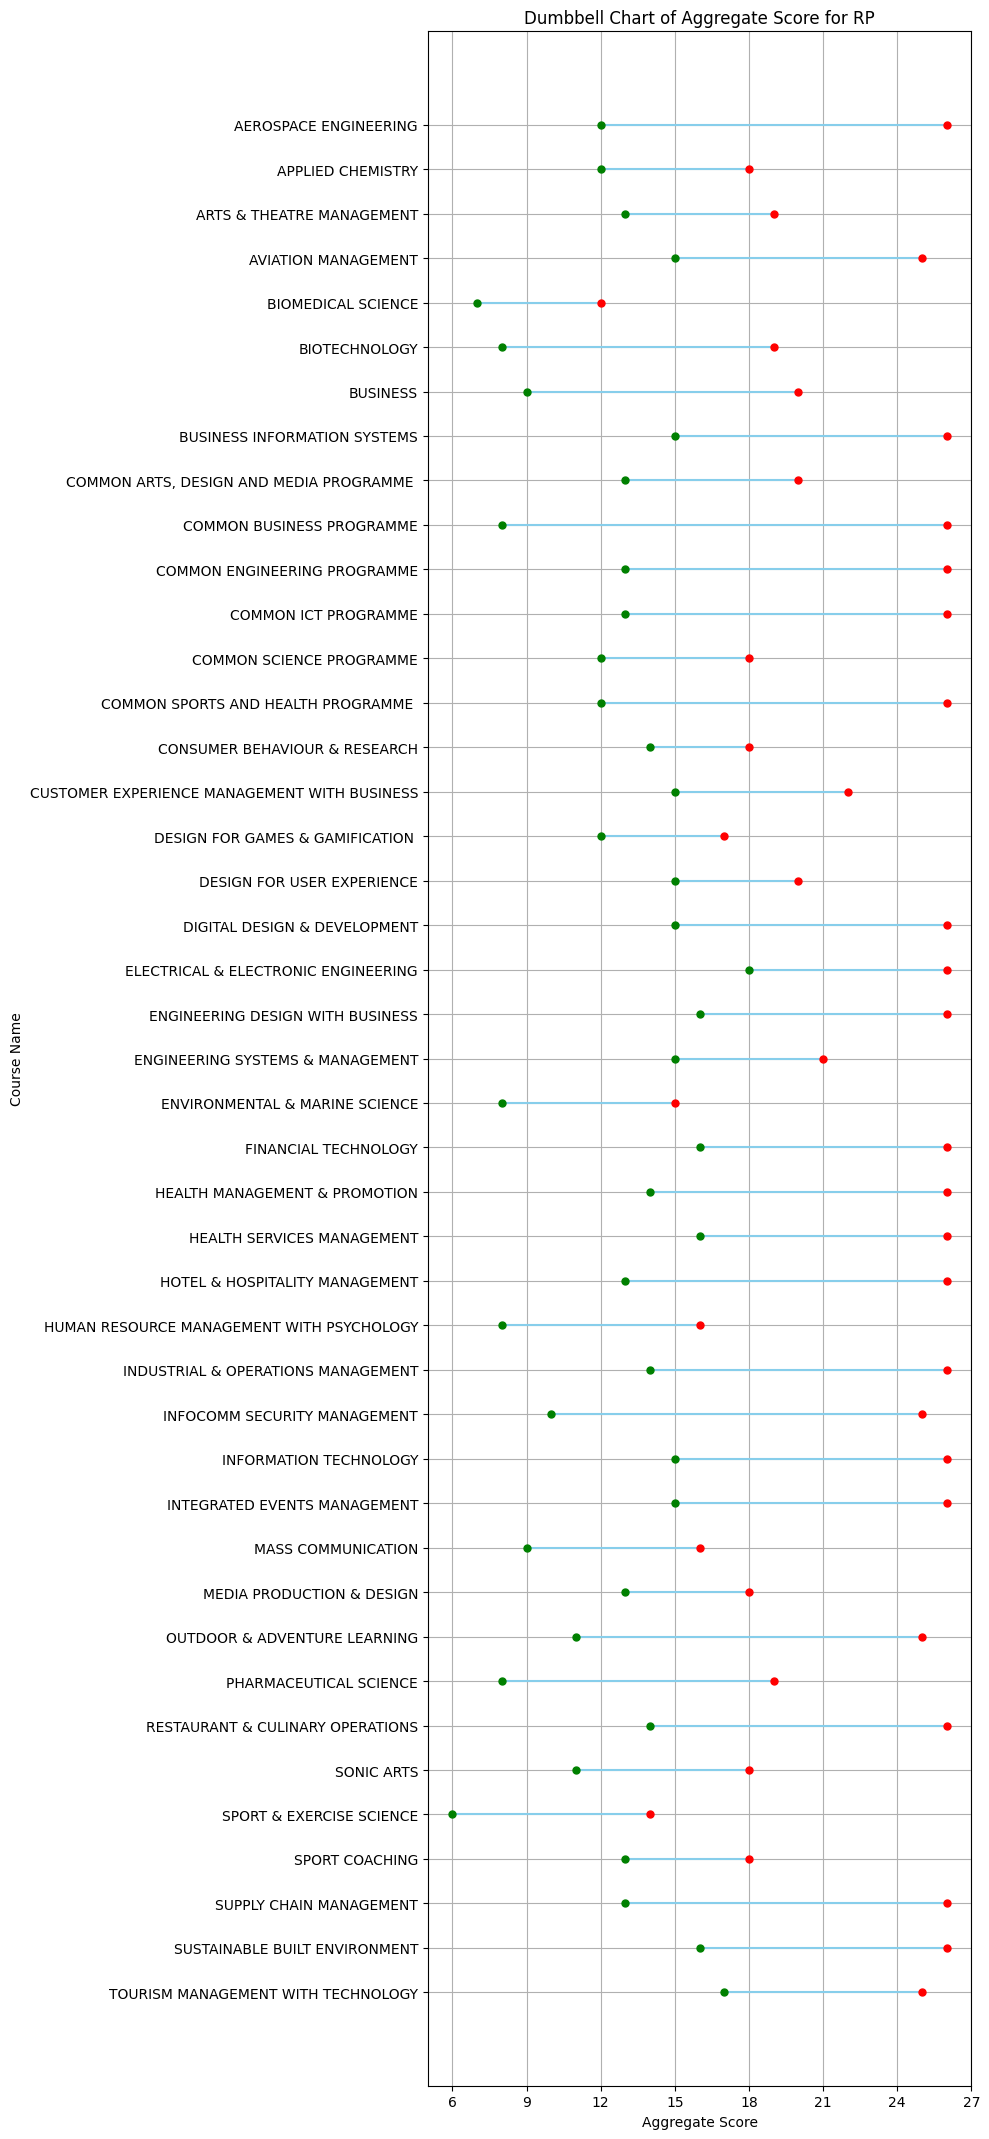

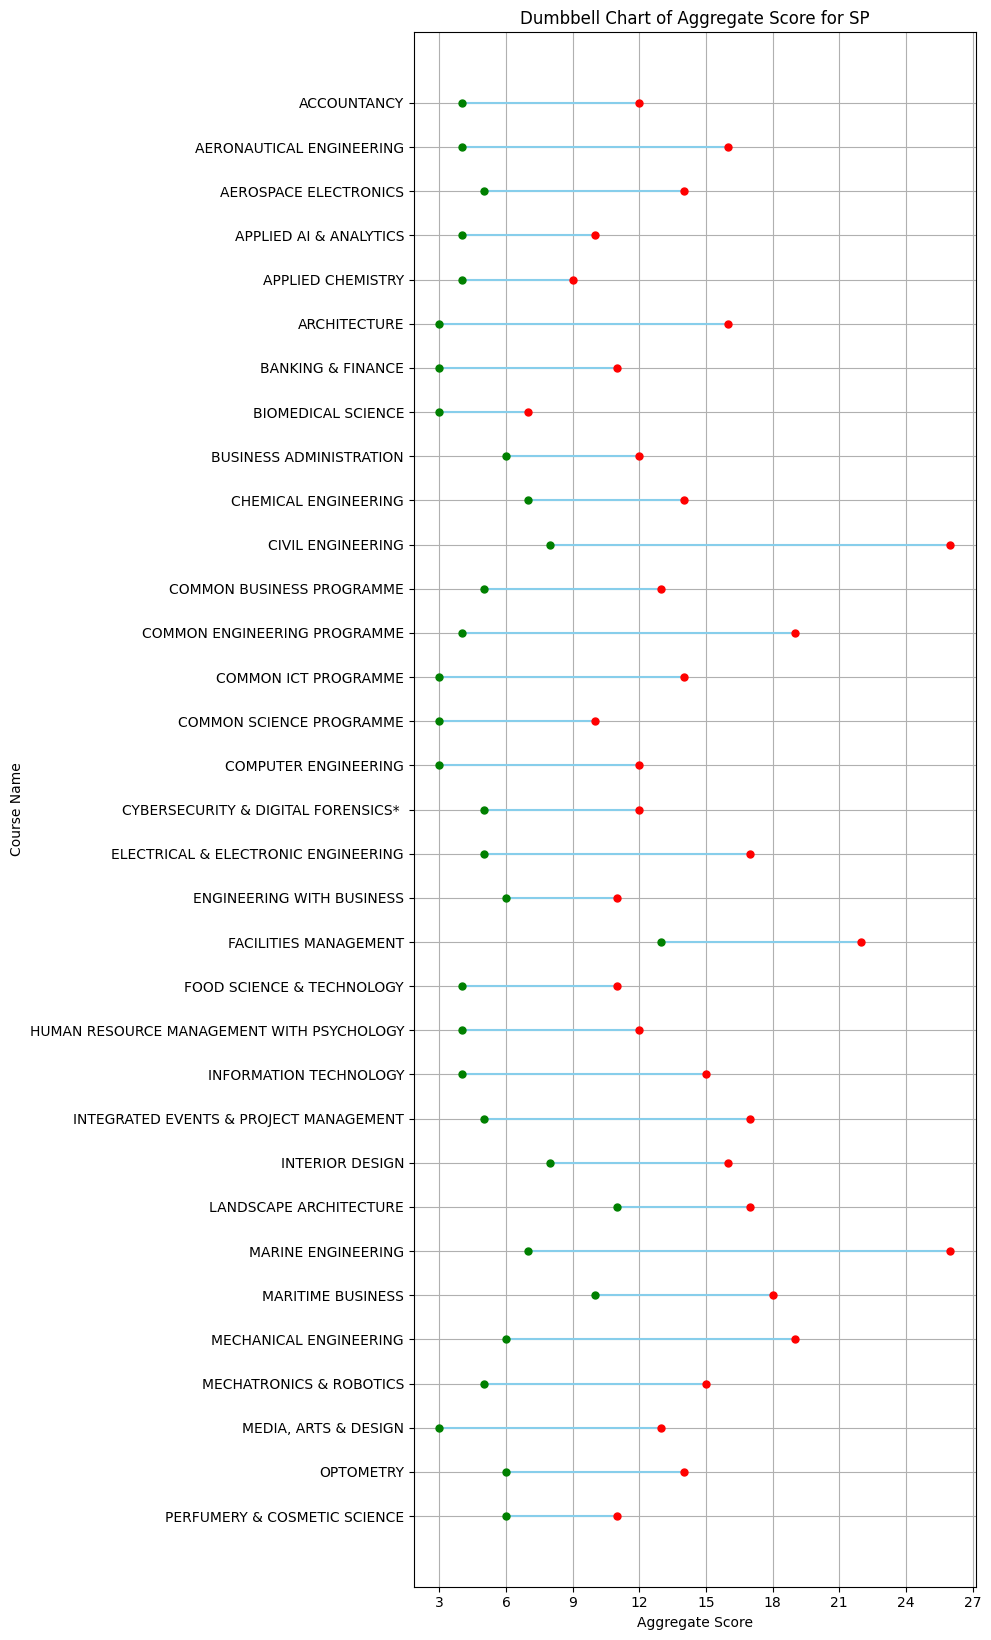

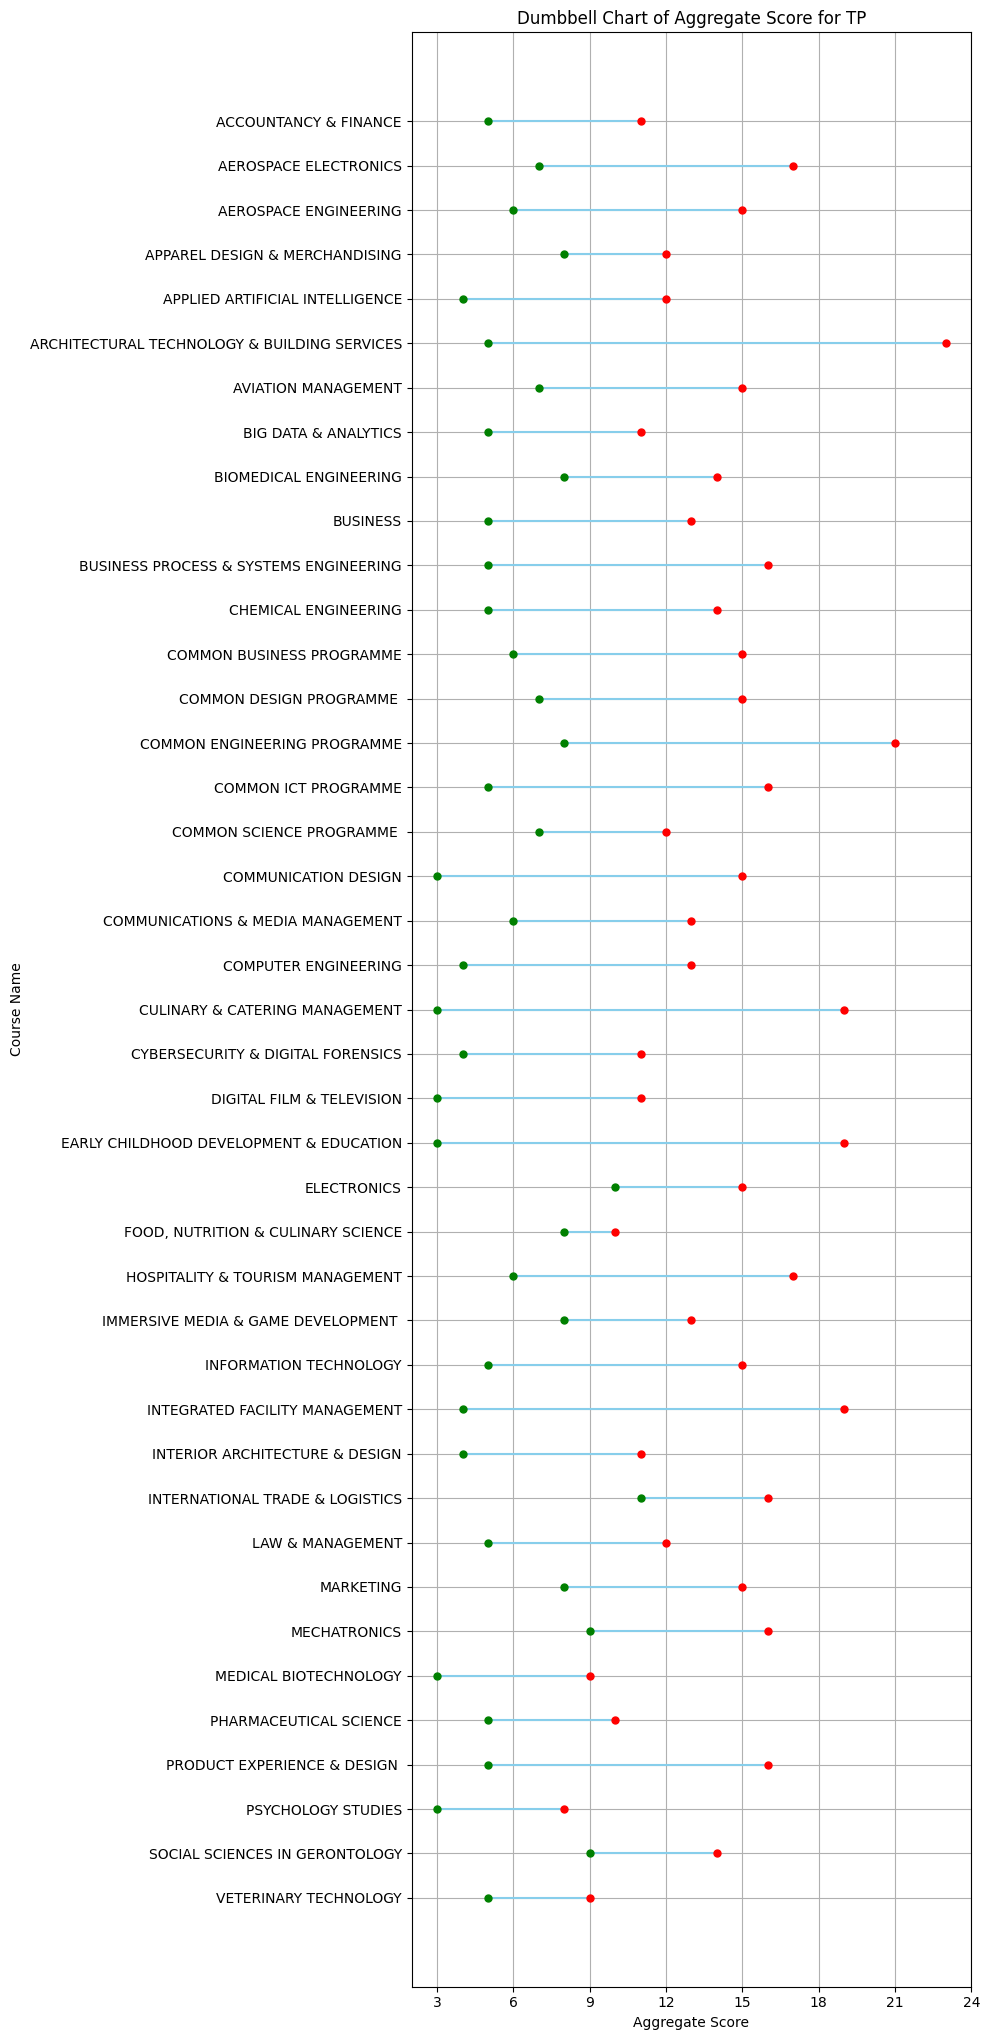

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Converting 'Min Aggregate' and 'Max Aggregate' to numeric
df_combined['Min Aggregate'] = pd.to_numeric(df_combined['Min Aggregate'], errors='coerce')
df_combined['Max Aggregate'] = pd.to_numeric(df_combined['Max Aggregate'], errors='coerce')

# Filtering out rows with NaN values in either 'Min Aggregate' or 'Max Aggregate'
df_filtered = df_combined.dropna(subset=['Min Aggregate', 'Max Aggregate'])

# Grouping by sheet name for individual charts
grouped = df_filtered.groupby('Sheet_Name')

# Creating a Dumbbell Chart for each sheet
for name, group in grouped:
    plt.figure(figsize=(10, len(group) * 0.5))
    plt.hlines(y=group['Course Name'], xmin=group['Min Aggregate'], xmax=group['Max Aggregate'], color='skyblue')
    plt.plot(group['Min Aggregate'], group['Course Name'], 'o', markersize=5, color='green')
    plt.plot(group['Max Aggregate'], group['Course Name'], 'o', markersize=5, color='red')
    plt.title(f'Dumbbell Chart of Aggregate Score for {name}')
    plt.xlabel('Aggregate Score')
    plt.ylabel('Course Name')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Only integer values on x-axis
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [32]:
df_combined

,MOE Course Code,Course Name,Aggregate Type,2023 Range of Aggregate Score (Net),Sheet_Name,Min Aggregate,Max Aggregate
0,R40,AEROSPACE ENGINEERING,ELR2B2-C,12-26,RP,12.0,26.0
1,R17,APPLIED CHEMISTRY,ELR2B2-C,12-18,RP,12.0,18.0
2,R25,ARTS & THEATRE MANAGEMENT,ELR2B2-A,13-19,RP,13.0,19.0
3,R39,AVIATION MANAGEMENT,ELR2B2-C,15-25,RP,15.0,25.0
4,R14,BIOMEDICAL SCIENCE,ELR2B2-C,7-12,RP,7.0,12.0
...,...,...,...,...,...,...,...
197,T25,PHARMACEUTICAL SCIENCE,ELR2B2-C,5-10,TP,5.0,10.0
198,T35,PRODUCT EXPERIENCE & DESIGN,ELR2B2-D,5-16,TP,5.0,16.0
199,T48,PSYCHOLOGY STUDIES,ELR2B2-A,3-8,TP,3.0,8.0
200,T53,SOCIAL SCIENCES IN GERONTOLOGY,ELR2B2-A,9-14,TP,9.0,14.0


In [33]:
df_filtered

,MOE Course Code,Course Name,Aggregate Type,2023 Range of Aggregate Score (Net),Sheet_Name,Min Aggregate,Max Aggregate
0,R40,AEROSPACE ENGINEERING,ELR2B2-C,12-26,RP,12.0,26.0
1,R17,APPLIED CHEMISTRY,ELR2B2-C,12-18,RP,12.0,18.0
2,R25,ARTS & THEATRE MANAGEMENT,ELR2B2-A,13-19,RP,13.0,19.0
3,R39,AVIATION MANAGEMENT,ELR2B2-C,15-25,RP,15.0,25.0
4,R14,BIOMEDICAL SCIENCE,ELR2B2-C,7-12,RP,7.0,12.0
...,...,...,...,...,...,...,...
197,T25,PHARMACEUTICAL SCIENCE,ELR2B2-C,5-10,TP,5.0,10.0
198,T35,PRODUCT EXPERIENCE & DESIGN,ELR2B2-D,5-16,TP,5.0,16.0
199,T48,PSYCHOLOGY STUDIES,ELR2B2-A,3-8,TP,3.0,8.0
200,T53,SOCIAL SCIENCES IN GERONTOLOGY,ELR2B2-A,9-14,TP,9.0,14.0


In [34]:
df_filtered.groupby(by=['Sheet_Name','Aggregate Type'])['Course Name'].size()

Sheet_Name  Aggregate Type
NP          ELR2B2-A           9
            ELR2B2-B           8
            ELR2B2-C          22
            ELR2B2-D           2
NYP         ELR2B2-A           1
            ELR2B2-B           8
            ELR2B2-C          27
            ELR2B2-D           4
RP          ELR2B2-A           4
            ELR2B2-B          10
            ELR2B2-C          26
            ELR2B2-D           3
SP          ELR2B2-B           5
            ELR2B2-C          22
            ELR2B2-D           6
TP          ELR2B2-A           5
            ELR2B2-B           7
            ELR2B2-C          23
            ELR2B2-D           6
Name: Course Name, dtype: int64

In [35]:
df_filtered.groupby(by=['Sheet_Name'])['Course Name'].size()

Sheet_Name
NP     41
NYP    40
RP     43
SP     33
TP     41
Name: Course Name, dtype: int64